In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [23]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [24]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


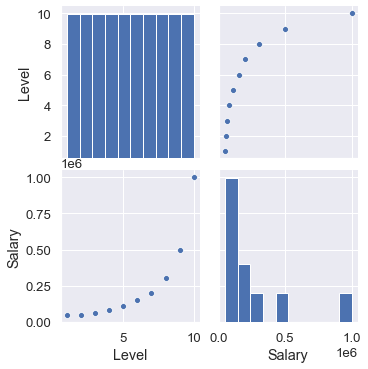

In [25]:
sns.pairplot(df)

In [26]:
#df=pd.get_dummies(df,columns=['Position'])

In [28]:
x = df['Level'].values.reshape(-1, 1)
y = df['Salary']

In [29]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
poly = PolynomialFeatures(degree=5)

In [32]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [33]:
x_train

array([[ 3],
       [ 1],
       [ 7],
       [ 6],
       [ 2],
       [ 9],
       [10]], dtype=int64)

In [34]:
x_train_poly

array([[1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [35]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test_poly)
y_pred

array([ 80807.53168182, 115481.95084466, 284673.2190862 ])

In [37]:
model.score(x_train_poly, y_train)

0.9999672827236054

In [38]:
model.score(x_test_poly, y_test)

0.9906692937121785

In [39]:
y_pred

array([ 80807.53168182, 115481.95084466, 284673.2190862 ])

In [40]:
y_test

3     80000
4    110000
7    300000
Name: Salary, dtype: int64

In [44]:
model.predict(poly.fit_transform([[10]]))

array([999665.50586505])